In [121]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
data=pd.read_csv('amazon_Sales.csv')
data.shape

(128976, 21)

------Category of Product------

In [123]:
product_category_data=data['Category'].value_counts()
indexs=product_category_data.index;
value=product_category_data.values;
print('Category of Products:')
print()
print(pd.DataFrame({'Category':indexs,'Count':value},index=None))

Category of Products:

   Category  Count
0   T-shirt  50292
1     Shirt  49877
2   Blazzer  15500
3  Trousers  10616
4   Perfume   1157
5    Wallet    926
6     Socks    440
7     Shoes    165
8     Watch      3


-------- Product Category vs its Order-------

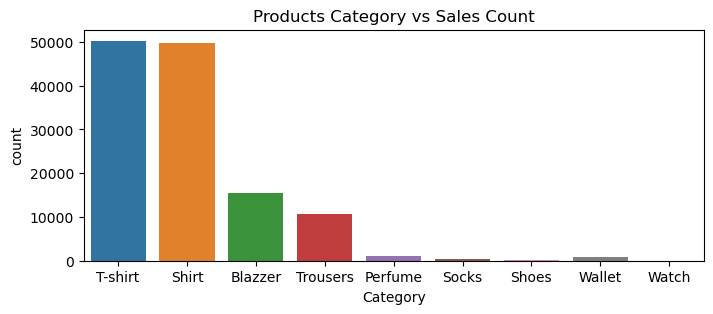

On the basis of the data:
Maximum Sale:T-shirt
Minimum Sale:Watch


In [124]:
plt.figure(figsize=(8,3))
plt.title('Products Category vs Sales Count')
sns.countplot(x='Category',data=data);
plt.show()
print('On the basis of the data:')
print('Maximum Sale:T-shirt')
print('Minimum Sale:Watch')

-------- Products Size vs Sale plot----------

Maximum Sale of T-shirt is of size: M
Maximum Sale of Shirt is of size: L
Maximum Sale of Blazzer is of size: L
Maximum Sale of Trousers is of size: XL
Maximum Sale of Perfume is of size: Free
Maximum Sale of Wallet is of size: Free
Maximum Sale of Socks is of size: S
Maximum Sale of Shoes is of size: Free
Maximum Sale of Watch is of size: Free


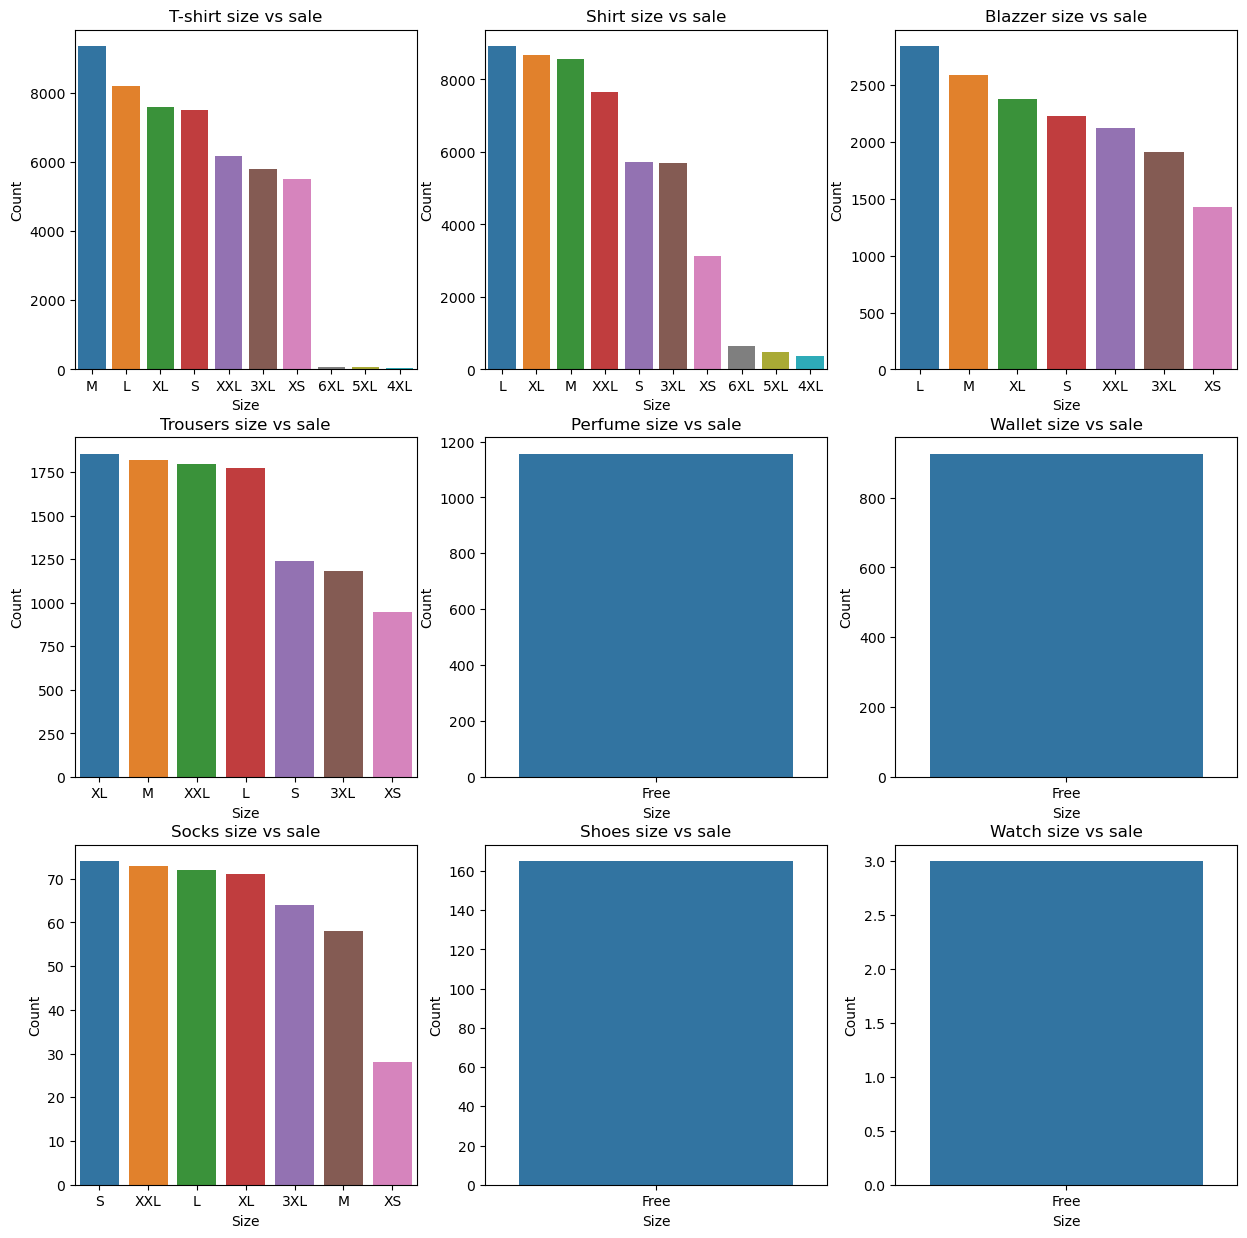

In [125]:
plt.figure(figsize=(15,15))
plot_count=1
for index in indexs:
    sizes=data[data['Category']==index]['Size'].value_counts().reset_index()
    sizes.columns=['Size','Count']
    print('Maximum Sale of '+index+' is of size: '+sizes['Size'][0])
    
    
       
for index in indexs:
    sizes=data[data['Category']==index]['Size'].value_counts().reset_index()
    sizes.columns=['Size','Count']
    plt.subplot(3,3,plot_count)
    plt.title(index+' size vs sale')
    sns.barplot(x='Size',y='Count',data=sizes)
    plot_count=plot_count+1

plt.show()

 ------Fulfilment Analysis:-------

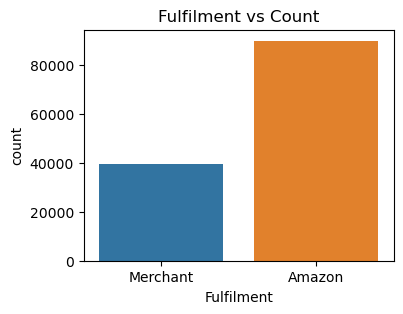

In [126]:
plt.figure(figsize=(4,3))
sns.countplot(x='Fulfilment',data=data)
plt.title('Fulfilment vs Count')
plt.show()

 -------Top 4 Status of Products-------

Ratio of Order Cancelled by Product Delivered to Buyer = 0.64
So for every 100 Delivered order 64 orders will be cancelled which is a problem for concern


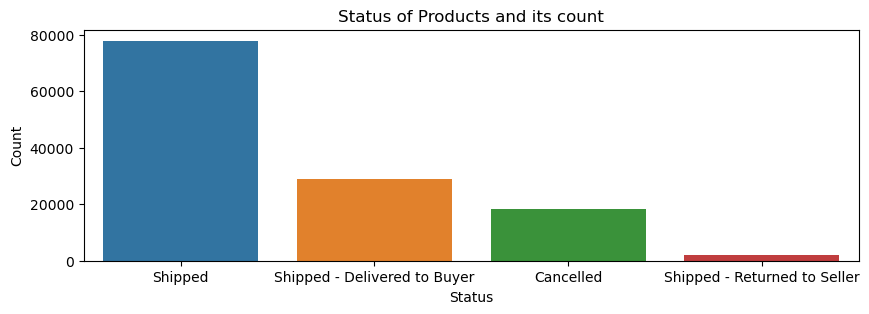

In [127]:
plt.figure(figsize=(10,3))
status_data=data['Status'].value_counts()
top_4_status=status_data[0:4].reset_index()
top_4_status.columns=['Status','Count']
sns.barplot(x='Status',y='Count',data=top_4_status)
plt.title('Status of Products and its count')
ratio=top_4_status.loc[2,'Count']/top_4_status.loc[1,'Count']
print(f'Ratio of Order Cancelled by Product Delivered to Buyer = {ratio:.2f}')
print('So for every 100 Delivered order 64 orders will be cancelled which is a problem for concern')
plt.show()

------- Analysis of Percentage of Order Cancelled on Fulfiment basis-------

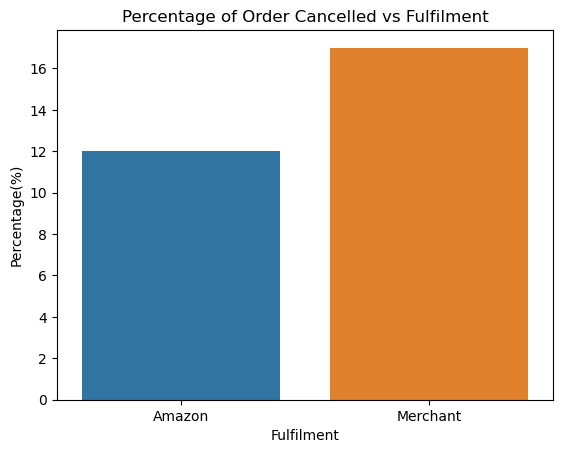

Percentage of Order cancelled out of Total order Fulfilled by Amazon is: 12
Percentage of Order cancelled out of Total order Fulfilled by Merchant is: 17
So,on the basis of data it is clear that orders cancelled more when fulfilment is done by Merchant


In [128]:
cancelled_order=data[data['Status']=='Cancelled']['Fulfilment'].value_counts().reset_index()
cancelled_order.columns=['Fulfilment','Percentage(%)']
merchant_orders=len(data[data['Fulfilment']=='Merchant'])
amazon_orders=len(data[data['Fulfilment']=='Amazon'])
cancelled_order.loc[0,'Percentage(%)']=int((cancelled_order.loc[0,'Percentage(%)']*100)/amazon_orders)
cancelled_order.loc[1,'Percentage(%)']=int((cancelled_order.loc[1,'Percentage(%)']*100)/merchant_orders)
plt.title('Percentage of Order Cancelled vs Fulfilment')
sns.barplot(x='Fulfilment',y='Percentage(%)',data=cancelled_order)
plt.show()
print('Percentage of Order cancelled out of Total order Fulfilled by Amazon is:',cancelled_order.loc[0,'Percentage(%)'])
print('Percentage of Order cancelled out of Total order Fulfilled by Merchant is:',cancelled_order.loc[1,'Percentage(%)'])
print('So,on the basis of data it is clear that orders cancelled more when fulfilment is done by Merchant')


---------Ship-Service-Level vs Count of Orders Cancelled-------

  Ship-Service  Count
0    Expedited  11427
1     Standard   6907


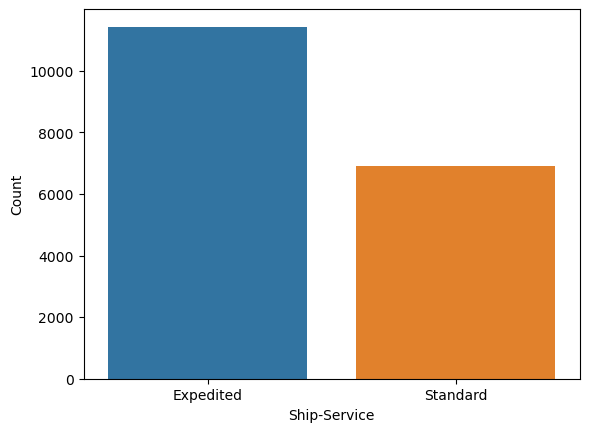

So on basis of these the order is cancelled more when ship service is Expedited


In [129]:
ship_service_data=data[data['Status']=='Cancelled']['ship-service-level'].value_counts().reset_index()
ship_service_data.columns=['Ship-Service','Count']
sns.barplot(x='Ship-Service',y='Count',data=ship_service_data)
print(ship_service_data)
plt.show()
print('So on basis of these the order is cancelled more when ship service is Expedited')

 --------Geographical Analysis:-------

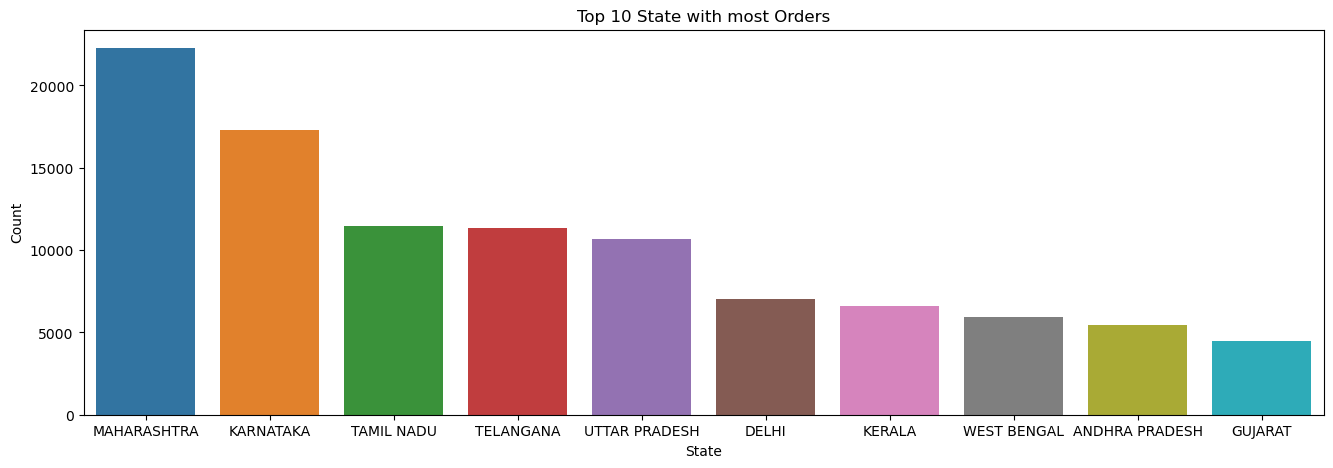

In [143]:
plt.figure(figsize=(16,5))
top_10_state=data['ship-state'].value_counts().head(10).reset_index()
top_10_state.columns=['State','Count']
sns.barplot(x='State',y='Count',data=top_10_state)
plt.title('Top 10 State with most Orders')
plt.show()

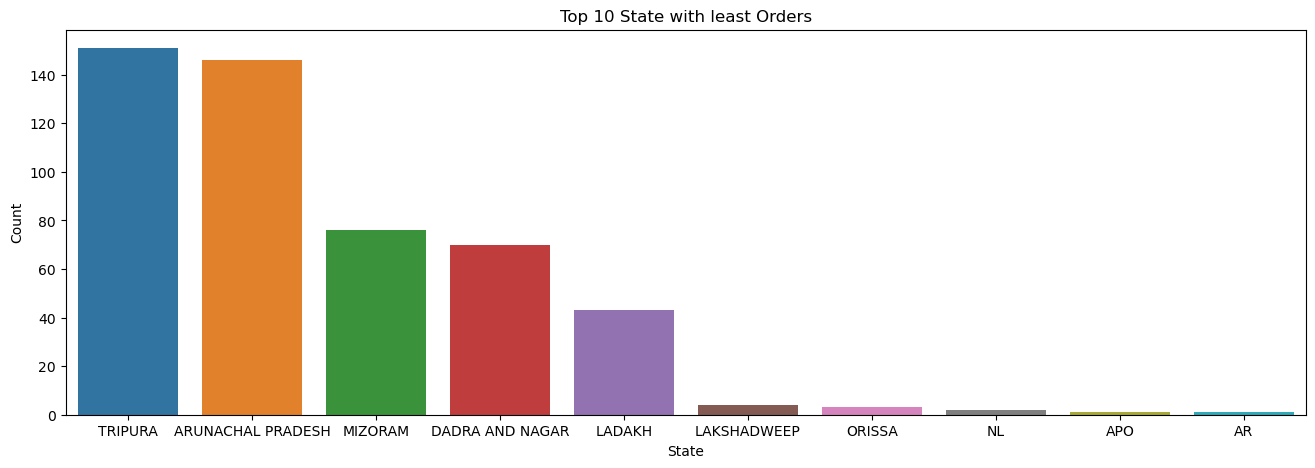

In [144]:
plt.figure(figsize=(16,5))
top_10_lstate=data['ship-state'].value_counts().tail(10).reset_index()
top_10_lstate.columns=['State','Count']
sns.barplot(x='State',y='Count',data=top_10_lstate)
plt.title('Top 10 State with least Orders')
plt.show()

-------Customer Segmentation:-------

-------- Top 3 state with Maximum Sale of Product------

[]

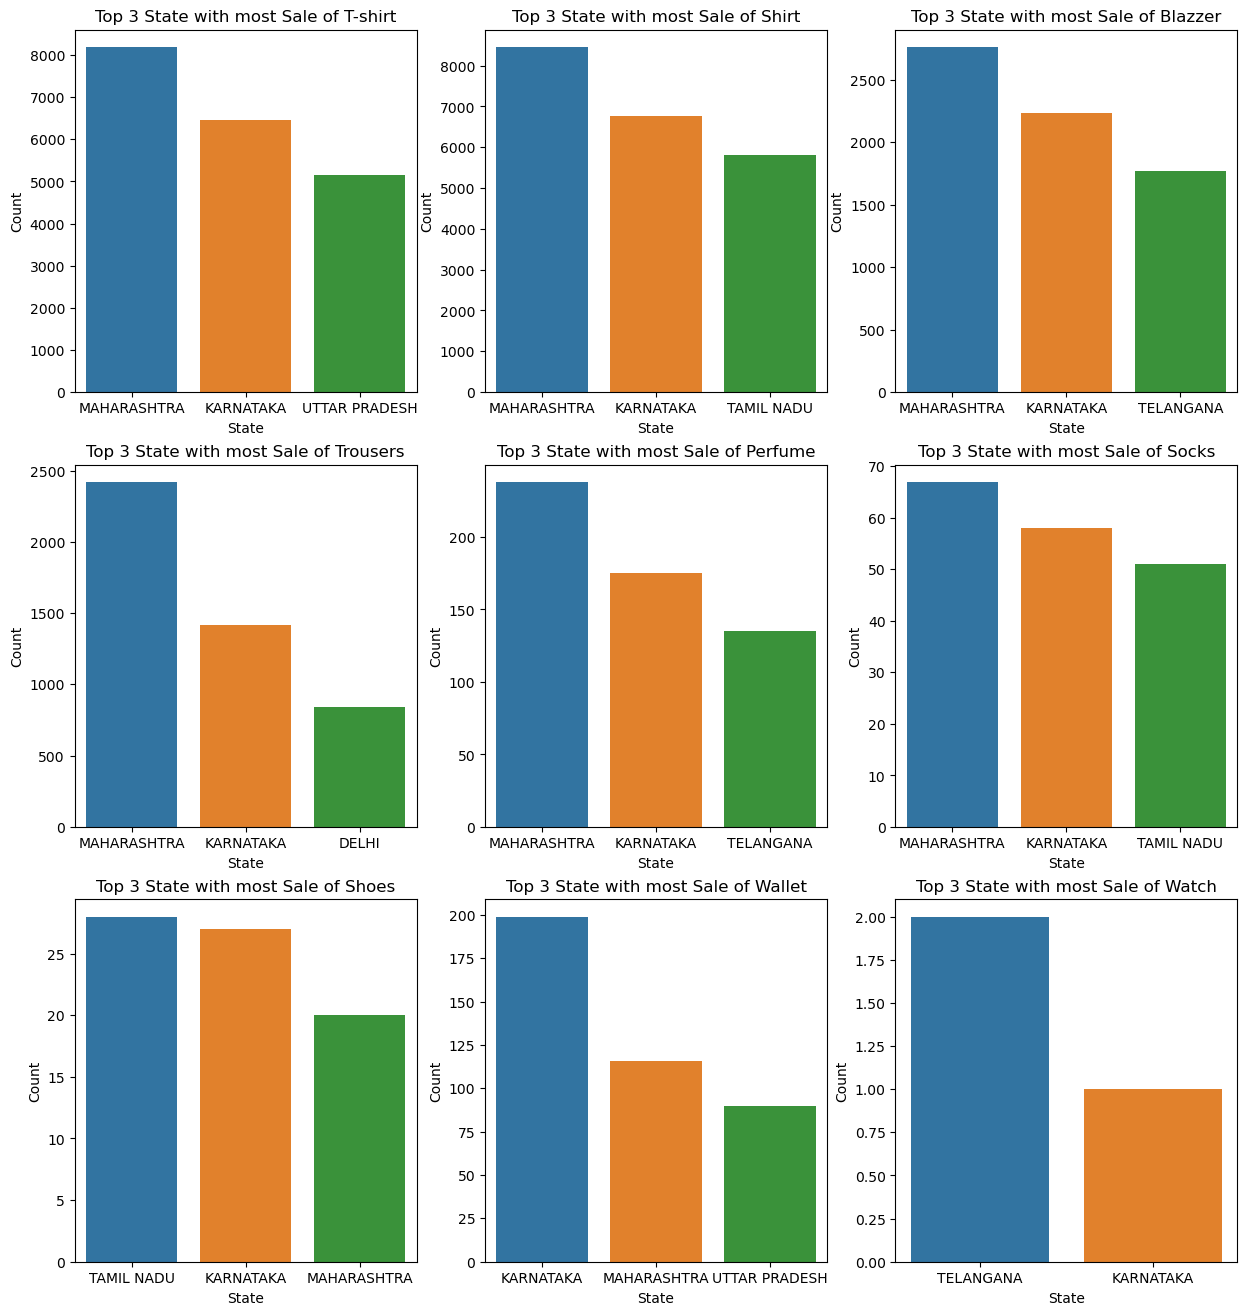

In [203]:
plt.figure(figsize=(15,16))
count=1
for category in data['Category'].unique():
    val=data[data['Category']==category]['ship-state'].value_counts().head(3).reset_index()
    val.columns=['State','Count']
    plt.subplot(3,3,count)
    plt.title('Top 3 State with most Sale of '+category)
    sns.barplot(x='State',y='Count',data=val)
    count=count+1

plt.plot()

 --------Top 3 city with Maximum sale vs Products-------

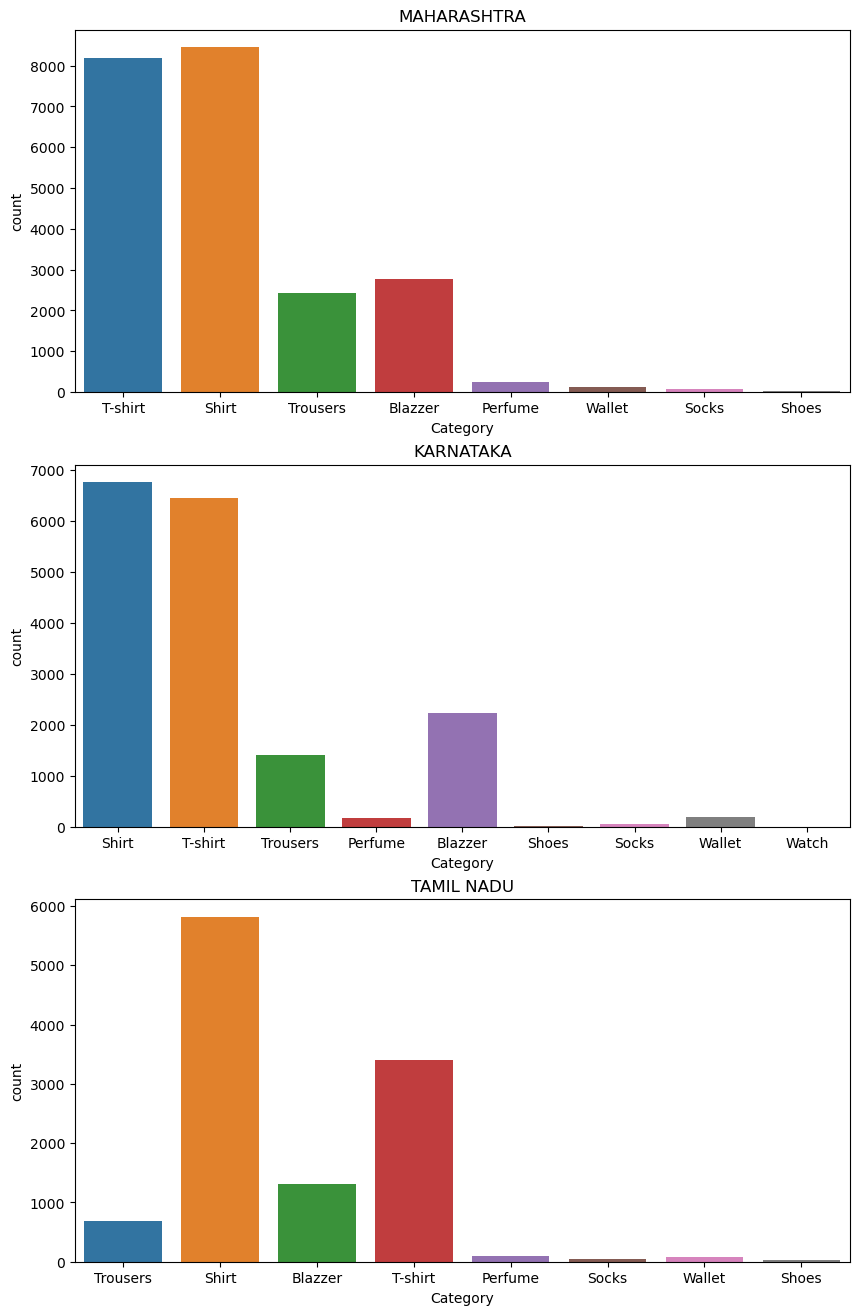

In [223]:
plt.figure(figsize=(10,16))
count=1;
for state in data['ship-state'].value_counts().head(3).index:
    plt.subplot(3,1,count)
    plt.title(state)
    sns.countplot(x='Category',data=data[data['ship-state']==state])
    count=count+1
    


plt.show()

------Sales Overview:---------

In [183]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS,Year,Month,Day
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,2022,4,30
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN,2022,4,30
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN,2022,4,30
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,2022,4,30
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN,2022,4,30


In [182]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Day'] = data['Date'].dt.day

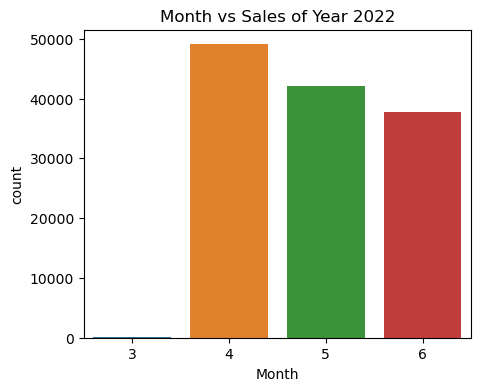

So on basis of data Maximum Order come on 4th Month and then decrease


In [204]:
plt.figure(figsize=(5,4))
plt.title('Month vs Sales of Year 2022')
sns.countplot(x='Month',data=data)
plt.show()
print('So on basis of data Maximum Order come on 4th Month and then decrease')